In [1]:
from pinn import PINN
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU, Dense, Input

In [9]:
class SelkovPINN(PINN):
    def __init__(self, x0, a, b, layers=None, name=None):
        super(SelkovPINN, self).__init__(x0, lambda t, x: self.selkov(x, a, b), layers=layers, name=name)

    def selkov(self, x, a, b):
        dx = -x[:,0] + a*x[:,1] + x[:,0]*x[:,0]*x[:,1]
        dy = b - a*x[:,1] - x[:,0]*x[:,0]*x[:,1]
        return tf.stack([dx, dy], 1)

    def selkov_ode(self, t, x, a, b):
        dx = -x[0] + a*x[1] + x[0]*x[0]*x[1]
        dy = b - a*x[1] - x[0]*x[0]*x[1]
        return [dx, dy]

    def plot(self, t):
        sol = solve_ivp(self.selkov_ode, y0=[0.1,0.2], t_span=(0,1.), max_step=0.01, args=(0.1,0.6), method='RK45')

        fig = plt.figure(figsize=[10, 10])
        ax = fig.gca()
        l1, = ax.plot(sol.t, sol.y[0])
        l1.set_label("RK45")
        l2, = ax.plot(t.numpy(), model(t)[:,0])
        l2.set_label("NN")
        ax.legend()

In [10]:
model = SelkovPINN([0.1,0.2], 0.1, 0.6)
model.add(Input(1))
model.add(Dense(128, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(2))
model.compile(optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.0001, beta_1=0.99, beta_2=0.999, epsilon=1e-07), loss="mse")

In [11]:
t = tf.constant(np.linspace(0.,1.,10000), shape=(10000,1), dtype=tf.float32)
model.compile(optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.00001, beta_1=0.99, beta_2=0.999, epsilon=1e-07), loss="mse")
model.fit(t, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 704us/step - loss: 0.0447
Epoch 2/100
313/313 [==============================] - 0s 687us/step - loss: 0.0323
Epoch 3/100
313/313 [==============================] - 0s 678us/step - loss: 0.0263
Epoch 4/100
313/313 [==============================] - 0s 696us/step - loss: 0.0209
Epoch 5/100
313/313 [==============================] - 0s 682us/step - loss: 0.0161
Epoch 6/100
313/313 [==============================] - 0s 684us/step - loss: 0.0115
Epoch 7/100
313/313 [==============================] - 0s 691us/step - loss: 0.0077
Epoch 8/100
313/313 [==============================] - 0s 692us/step - loss: 0.0045
Epoch 9/100
313/313 [==============================] - 0s 703us/step - loss: 0.0021
Epoch 10/100
313/313 [==============================] - 0s 698us/step - loss: 6.9917e-04
Epoch 11/100
313/313 [==============================] - 0s 712us/step - loss: 1.3332e-04
Epoch 12/100
313/313 [==============================] - 0s 698us/s

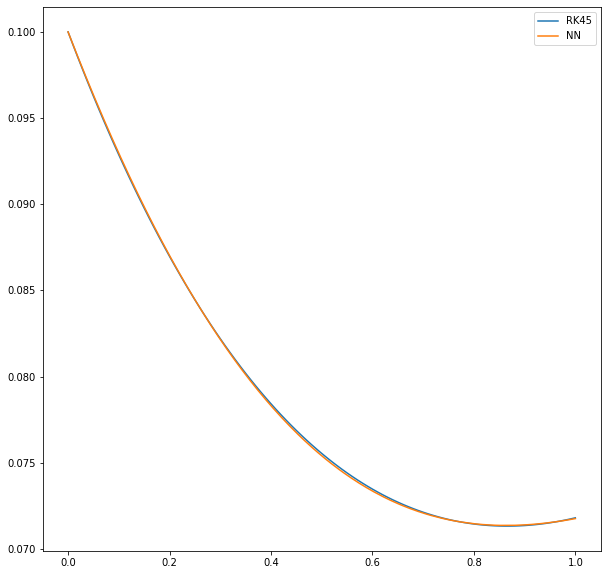

In [12]:
model.plot(t)